In [1]:
# import libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data file and drop 'kalibratie' rows

file = '../data/labeled/movement/concatenated.csv'
df = pd.read_csv(file, index_col=0)
df.drop(df[df['label'] == 'kalibratie'].index, inplace=True)

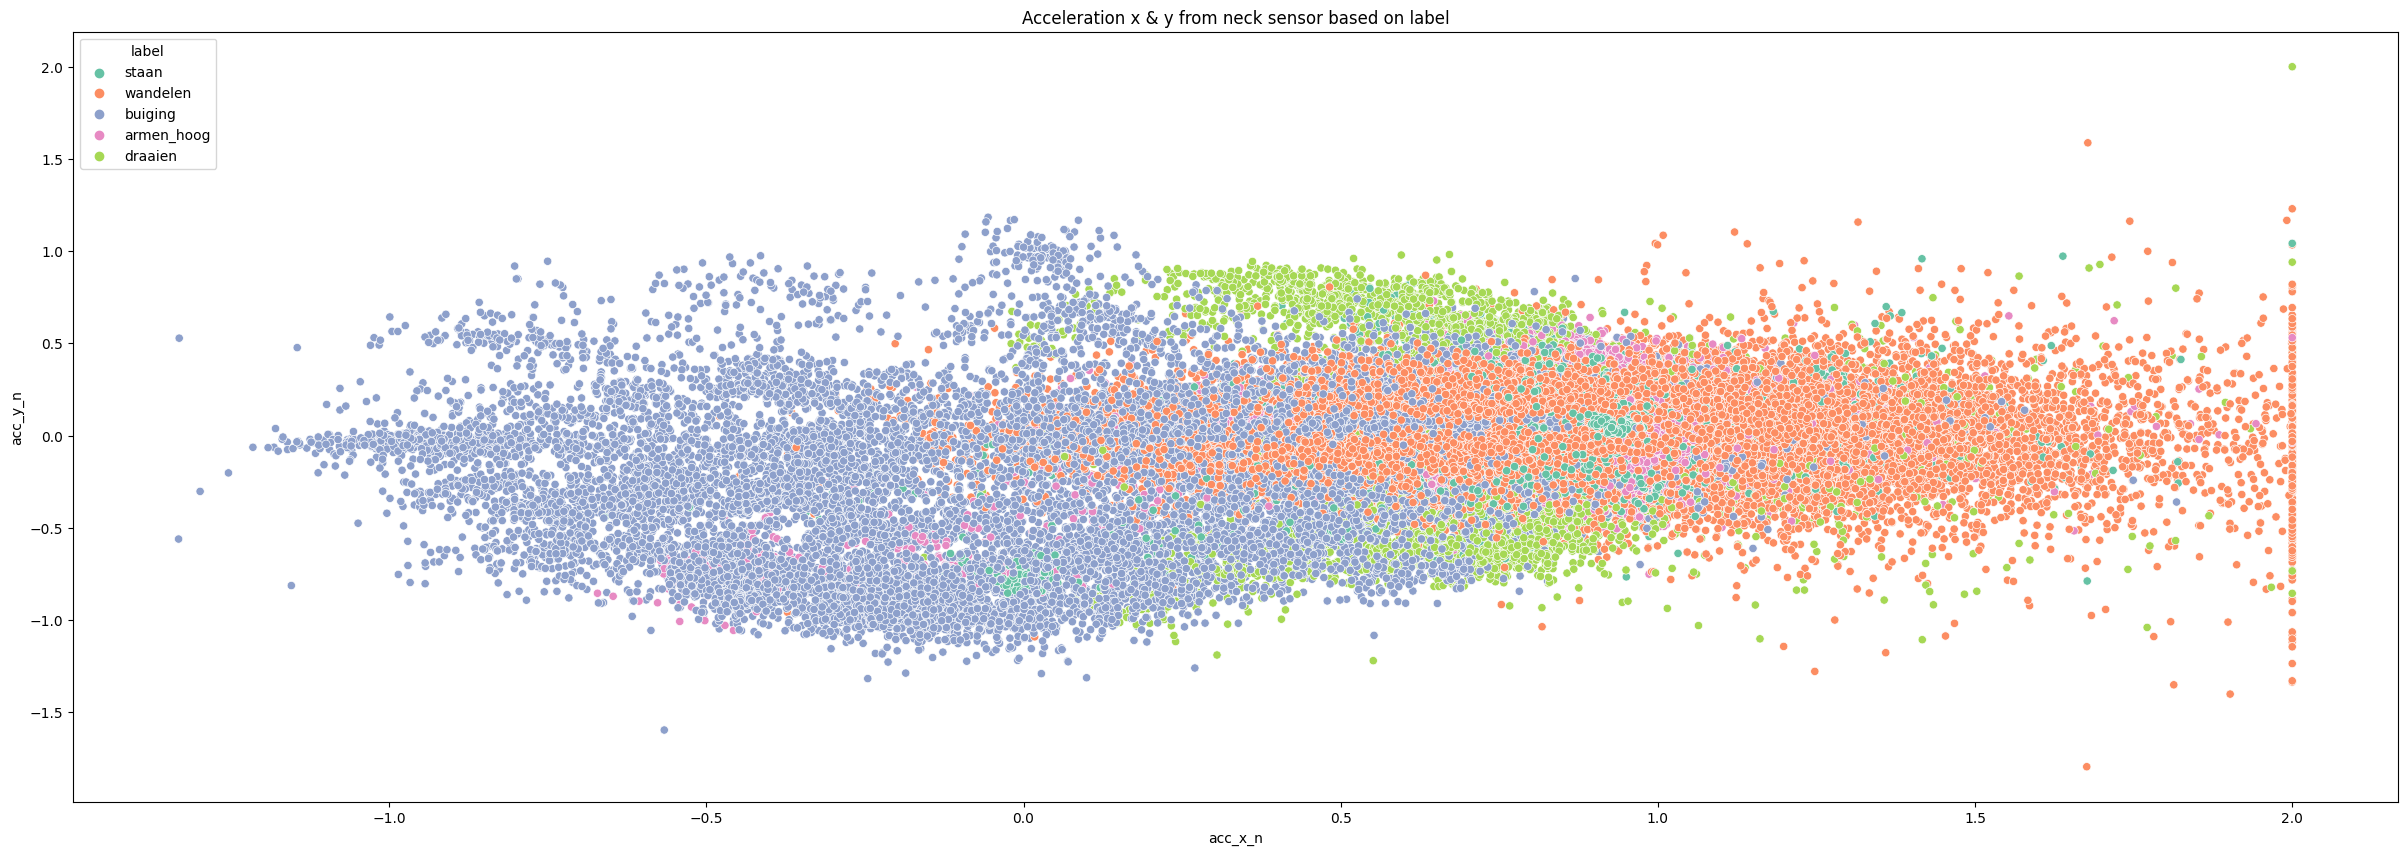

In [3]:
# create acc_x_n & acc_y_n scatter plot

fig, ax = plt.subplots(figsize=(30, 10))
sns.scatterplot(x = 'acc_x_n', y='acc_y_n', hue='label', data=df, palette="Set2", ax=ax)
plt.title("Acceleration x & y from neck sensor based on label")
plt.show()

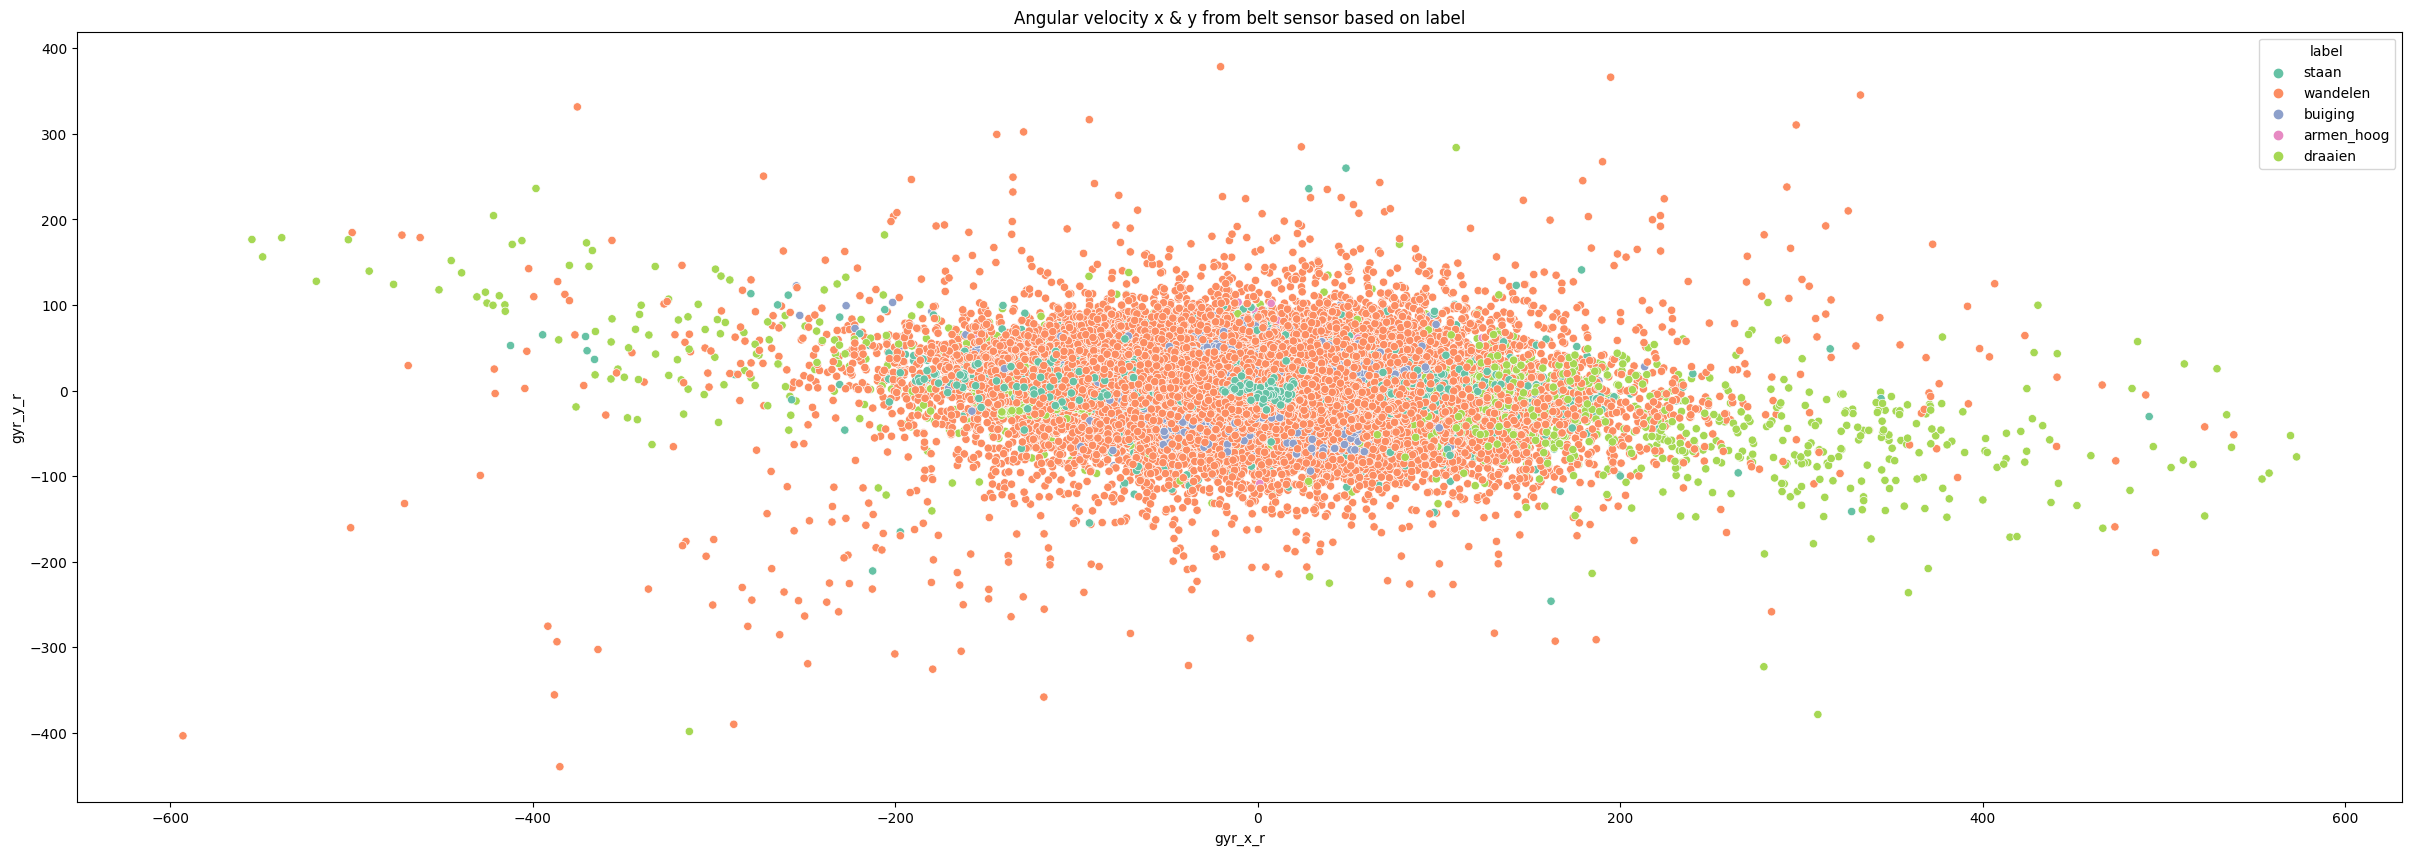

In [4]:
# create gyr_x_r & gyr_y_r scatter plot

fig, ax = plt.subplots(figsize=(30, 10))
sns.scatterplot(x = 'gyr_x_r', y='gyr_y_r', hue='label', data=df, palette="Set2", ax=ax)
plt.title("Angular velocity x & y from belt sensor based on label")
plt.show()

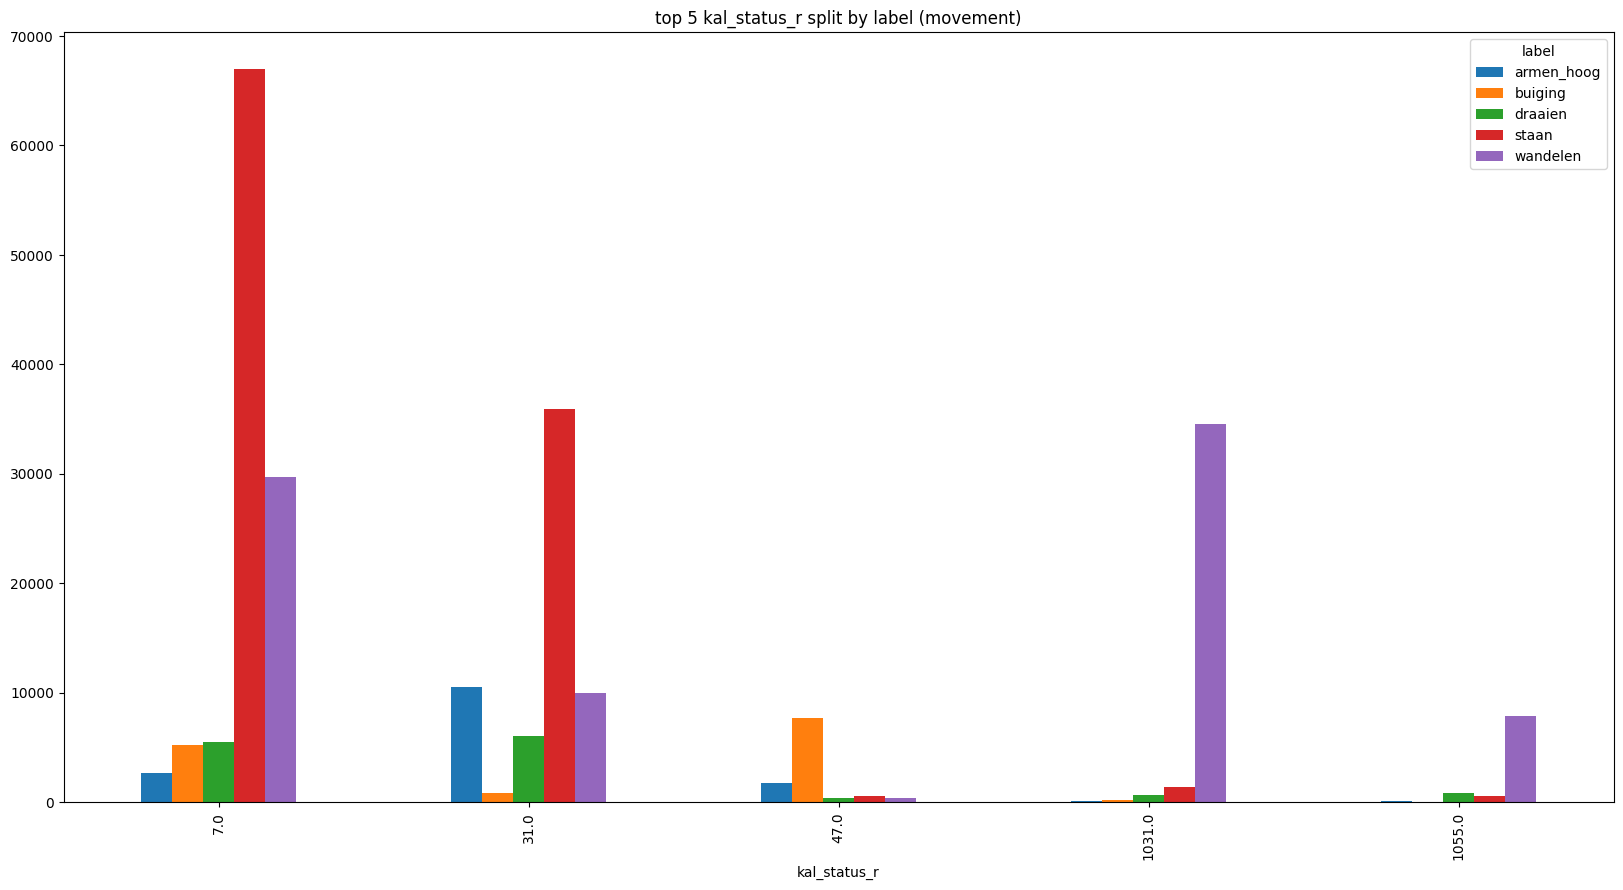

In [5]:
# create bar plot for top 5 kal_status_n split by label

ksr_label = df[['kal_status_r', 'label']]
ksr_top = ksr_label.loc[ksr_label['kal_status_r'].isin([7.0, 31.0, 1031.0, 47.0, 1055.0])]
ksr_top.groupby('kal_status_r')['label'].value_counts().unstack().plot(kind='bar', figsize=(20,10))
plt.title('top 5 kal_status_r split by label (movement)')
plt.show()

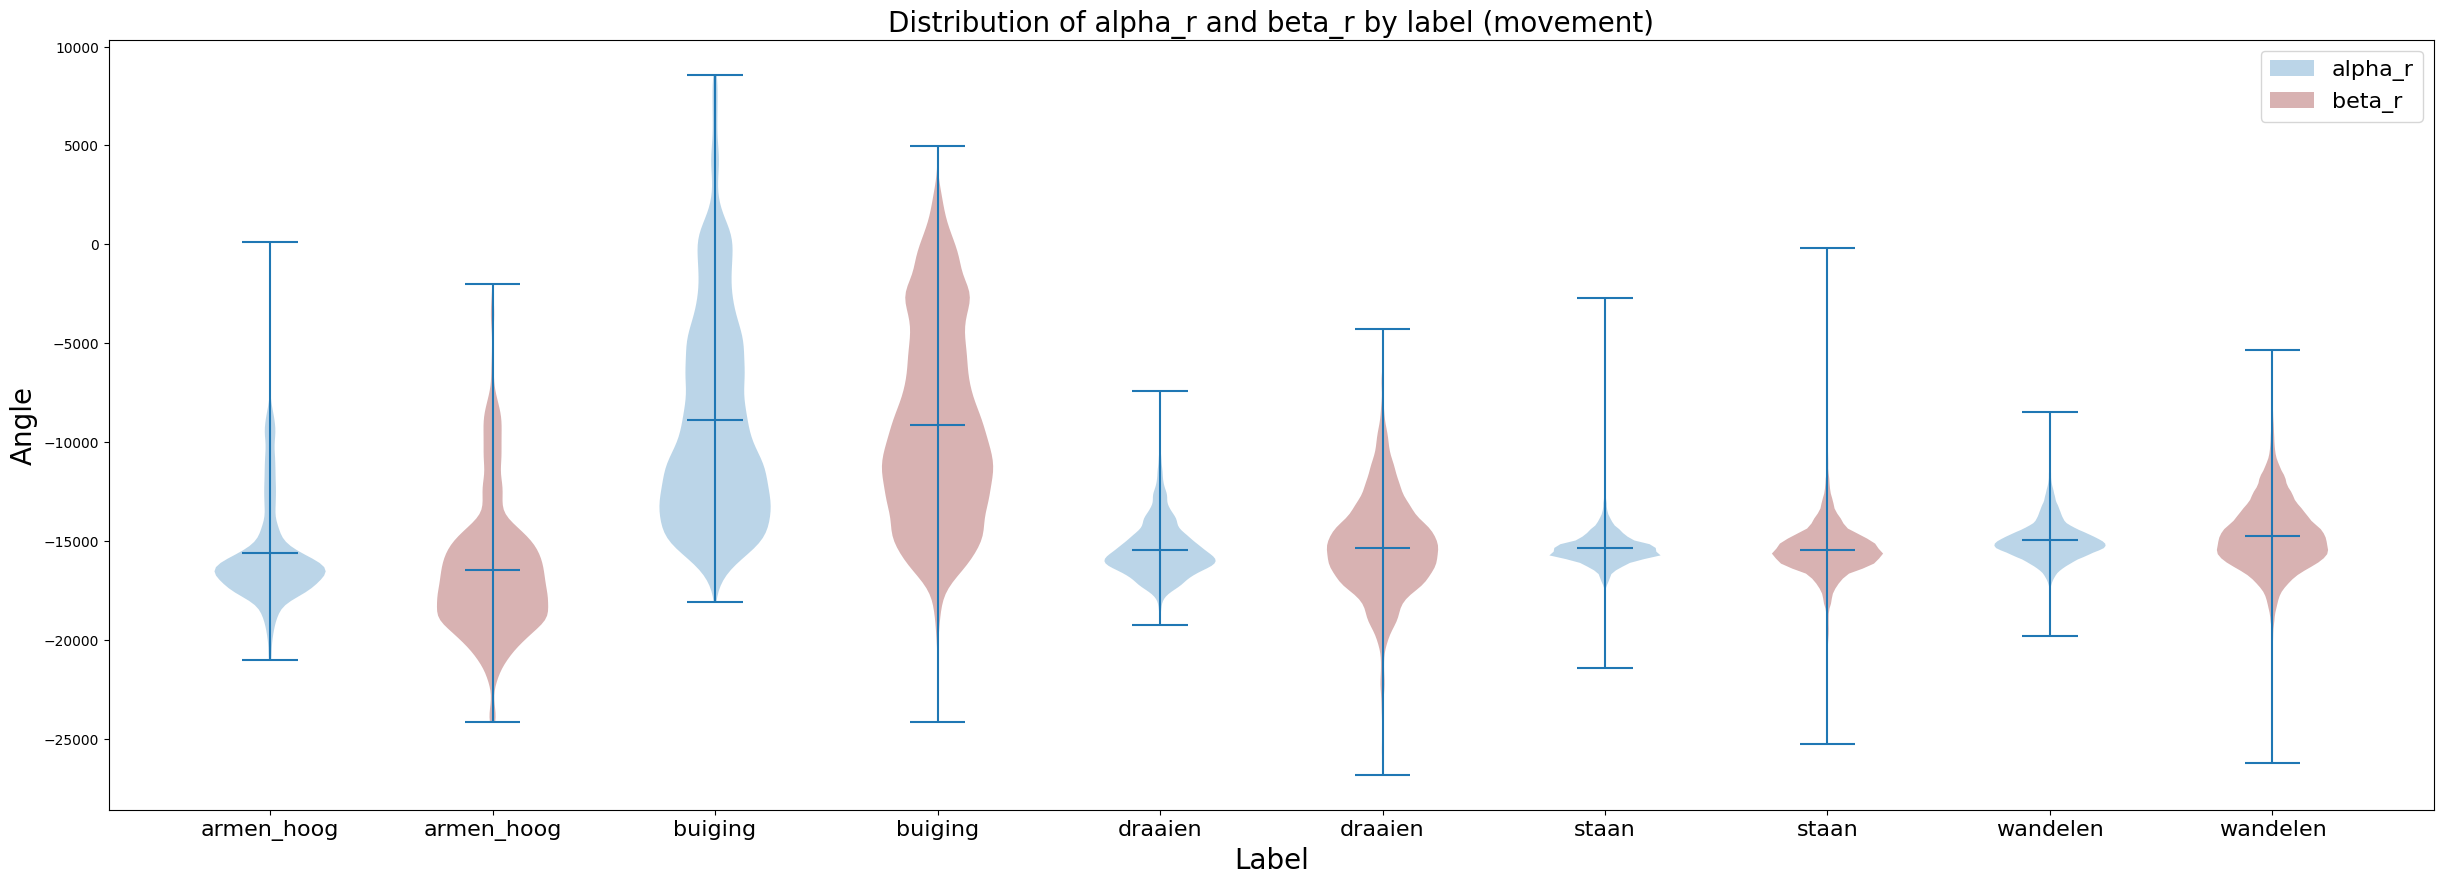

In [6]:
# create violin plot for the distribution of alpha_r and beta_r by label

data_to_violin = [df['alpha_r'][df['label'] == 'armen_hoog'],
                  df['beta_r'][df['label'] == 'armen_hoog'],
                  df['alpha_r'][df['label'] == 'buiging'],
                  df['beta_r'][df['label'] == 'buiging'],
                  df['alpha_r'][df['label'] == 'draaien'],
                  df['beta_r'][df['label'] == 'draaien'],
                  df['alpha_r'][df['label'] == 'staan'],
                  df['beta_r'][df['label'] == 'staan'],
                  df['alpha_r'][df['label'] == 'wandelen'],
                  df['beta_r'][df['label'] == 'wandelen']]
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(111)
x_pos = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
x_labels = ['armen_hoog', 'armen_hoog', 'buiging', 'buiging', 'draaien', 'draaien', 'staan', 'staan', 'wandelen', 'wandelen']
vp = ax.violinplot(data_to_violin, showmeans=True)
vp['bodies'][1].set_facecolor('#800000')
vp['bodies'][3].set_facecolor('#800000')
vp['bodies'][5].set_facecolor('#800000')
vp['bodies'][7].set_facecolor('#800000')
vp['bodies'][9].set_facecolor('#800000')
plt.title('Distribution of alpha_r and beta_r by label (movement)', fontsize=20)
plt.xlabel('Label', fontsize=20)
plt.ylabel('Angle', fontsize=20)
plt.xticks(x_pos, x_labels, fontsize=16)
plt.legend([vp['bodies'][0], vp['bodies'][1]], ['alpha_r', 'beta_r'], fontsize=16)
plt.show()

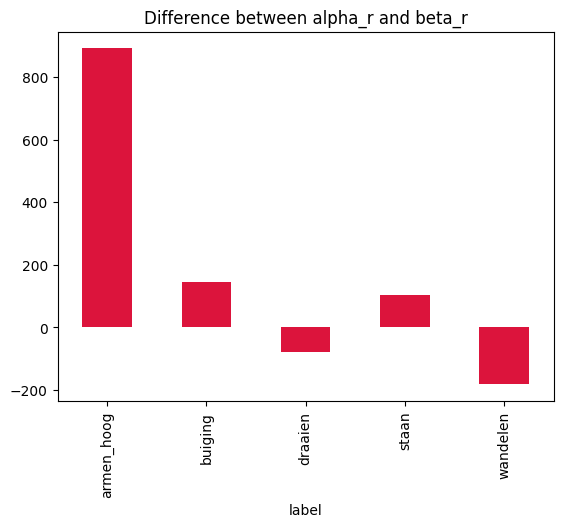

In [7]:
# create bar plot for the difference between alpha_r and beta_r

df.groupby(['label'])['diff_alpha_beta'].median().plot.bar(color=('crimson'), title='Difference between alpha_r and beta_r')
plt.show()